## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [4]:
df = pd.read_csv('C:/DataScienceUpgrad/Main Course/capstone project/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


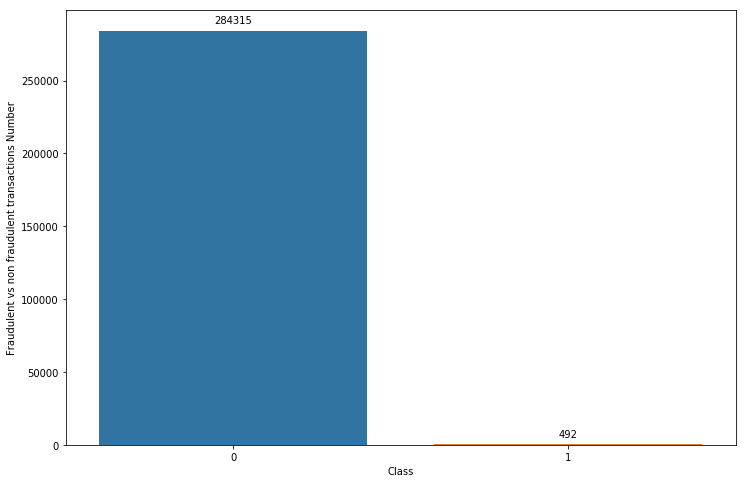

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Class", data=df)
plt.xlabel('Class')
plt.ylabel('Fraudulent vs non fraudulent transactions Number')
for p in ax.patches:
        ax.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


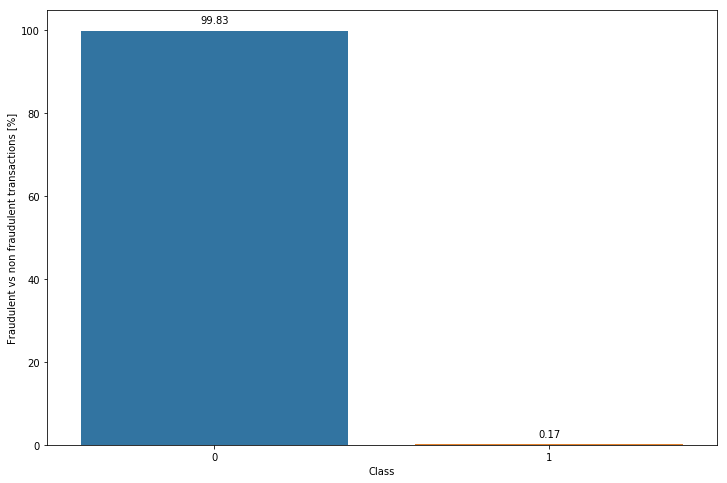

In [6]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df.Class.value_counts().index, y=df.Class.value_counts(normalize=True)*100)
plt.xlabel('Class')
plt.ylabel('Fraudulent vs non fraudulent transactions [%]')
for p in ax.patches:
        ax.annotate(format(p.get_height(), '0.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Create a scatter plot between PC1 and PC2 to observe the distribution of classes 
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x="V1", y="V2", data=df, hue="Class")

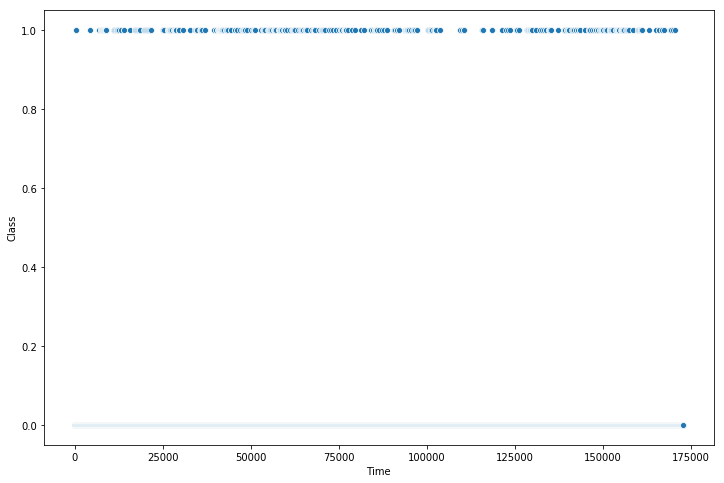

In [7]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x="Time", y="Class", data=df)

fraudulent transactions are prevalaent through out the whole time frame given.

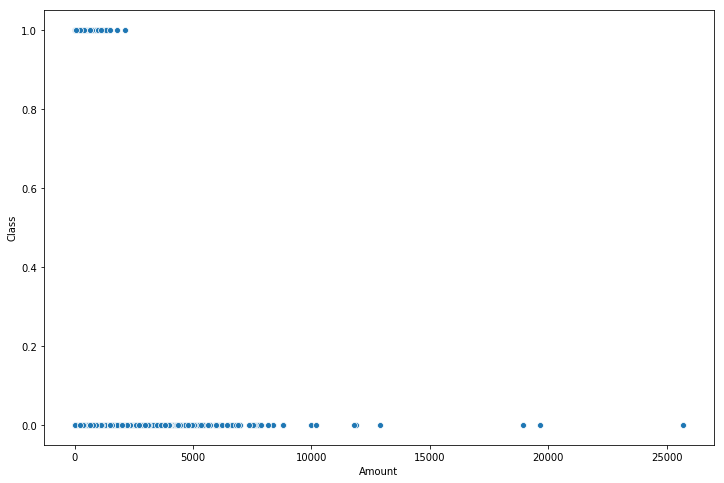

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x="Amount", y="Class", data=df)

All the fraud transactions are low value transactions in range 0 to 2500

In [5]:
# Drop unnecessary columns
# Time is not adding any information for the data we can drop it.
df.drop(['Time'], axis=1,inplace=True)

### Splitting the data into train & test data

In [6]:
y= df.pop('Class')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,y, train_size=0.8,test_size=0.2,stratify=y,random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

C:\Users\gupta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


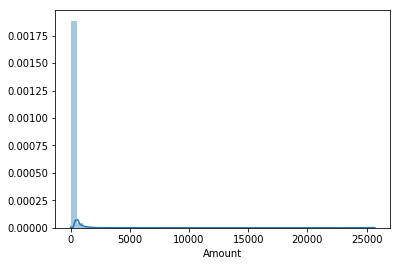

In [20]:
# plot the histogram of a variable from the dataset to see the skewness

ax=sns.distplot(X_train['Amount'])


In [21]:
df.skew(axis = 0, skipna = True) 

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [8]:
cols=X_train.columns

In [9]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
pt.fit(X_train[cols])  
X_train[cols]= pt.transform(X_train[cols])    ## Then apply on all data
X_test[cols] = pt.transform(X_test[cols])

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\gupta\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\gupta\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

C:\Users\gupta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


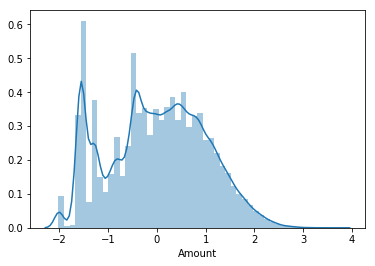

In [10]:
# plot the histogram of a variable from the dataset again to see the result 

ax=sns.distplot(X_train['Amount'])

## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression with Lasso Regularization

In [39]:
# Logistic Regression with Lasso regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [.00001,.0001,0.001]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.399211,0.029942,0.003392,0.002793,1e-05,{'alpha': 1e-05},0.527974,0.555240,0.465964,0.525617,...,0.515530,0.029836,1,0.514879,0.508474,0.529161,0.515399,0.521349,0.517853,0.006970
1,0.427099,0.033499,0.002394,0.002932,0.0001,{'alpha': 0.0001},0.527839,0.554899,0.467753,0.524128,...,0.515408,0.029085,2,0.514655,0.508254,0.528952,0.515193,0.521139,0.517639,0.006974
2,0.261279,0.014711,0.004122,0.006065,0.001,{'alpha': 0.001},0.510983,0.536467,0.468326,0.496120,...,0.499239,0.023291,3,0.497219,0.491540,0.512042,0.498702,0.504524,0.500805,0.006975


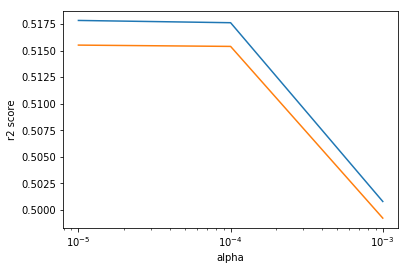

In [41]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [43]:
# model with optimal alpha 10^-4
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.5175266933936998
0.49061190720226633


In [45]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.002),
 ('V1', -0.007),
 ('V2', 0.004),
 ('V3', -0.012),
 ('V4', 0.008),
 ('V5', -0.006),
 ('V6', -0.002),
 ('V7', -0.011),
 ('V8', 0.002),
 ('V9', -0.004),
 ('V10', -0.011),
 ('V11', 0.009),
 ('V12', -0.013),
 ('V13', 0.001),
 ('V14', -0.013),
 ('V15', -0.001),
 ('V16', -0.009),
 ('V17', -0.015),
 ('V18', -0.005),
 ('V19', 0.001),
 ('V20', -0.0),
 ('V21', 0.001),
 ('V22', 0.0),
 ('V23', -0.0),
 ('V24', -0.001),
 ('V25', 0.001),
 ('V26', -0.0),
 ('V27', 0.001),
 ('V28', 0.0),
 ('Amount', -0.0)]

In [46]:
selected_features_lasso = X_train.columns[(lm.coef_!=0)]

In [47]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features_lasso)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(lm.coef_ == 0)))

total features: 29
selected features: 26
features with coefficients shrank to zero: 3


In [63]:
# converting y_train_pred and y_test_pred to data frames
y_train_pred_df=pd.DataFrame(y_train_pred)
y_train_pred_df.head()

,0
0,0.000514
1,-0.003323
2,-0.004696
3,0.002818
4,-0.003773


In [64]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Class
265518,0
180305,0
42664,0
198723,0
82325,0


In [65]:

# Removing index for both dataframes to append them side by side 
y_train_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending bal_y_train_df and pred_probs_train_df
y_pred_final = pd.concat([y_train_df,y_train_pred_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Class','Fraud_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # Remove the CWD from sys.path while we load stuff.


,Class,Fraud_Prob
0,0,0.000514
1,0,-0.003323
2,0,-0.004696
3,0,0.002818
4,0,-0.003773


In [68]:
# replacing all negative probabilities with 0
y_pred_final[y_pred_final < 0] = 0

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Class, y_pred_final.Fraud_Prob, drop_intermediate = False )

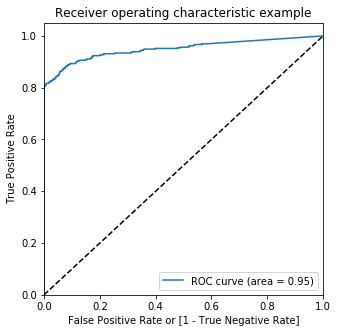

In [70]:
draw_roc( y_pred_final.Class, y_pred_final.Fraud_Prob)

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Class,Fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000514,1,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0,0,0,0,0,0,0,0,0
3,0,0.002818,1,0,0,0,0,0,0,0,0,0
4,0,0.000000,0,0,0,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    #total1=sum(sum(cm1))
    #accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] =[ i ,precision,recall]
print(cutoff_df)

     prob  precision    recall
0.0   0.0   0.002878  0.969543
0.1   0.1   0.844086  0.796954
0.2   0.2   0.845946  0.794416
0.3   0.3   0.866242  0.690355
0.4   0.4   0.876596  0.522843
0.5   0.5   0.855615  0.406091
0.6   0.6   0.830189  0.335025
0.7   0.7   0.860465  0.281726
0.8   0.8   0.825243  0.215736
0.9   0.9   0.825243  0.215736


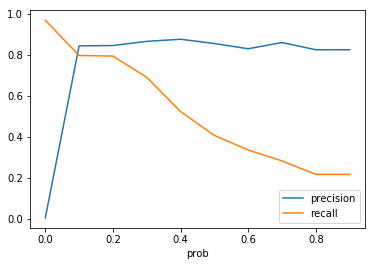

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['precision','recall'])
plt.show()

optimum threshold = 0.1 at which precision and recall is 80 % for training data

#### Model evaluation on Test data

In [75]:

y_test_pred_df=pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
0,-0.000610
1,0.003253
2,0.008104
3,-0.001652
4,0.010547


In [76]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Class
263020,0
11378,0
147283,0
219439,0
36939,0


In [78]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending bal_y_test_df and y_test_pred_df
y_pred_final_test = pd.concat([y_test_df,y_test_pred_df],axis=1)
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 0 : 'Fraud_Prob'})
# Rearranging the columns
y_pred_final_test = y_pred_final_test.reindex_axis(['Class','Fraud_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_test.head()

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


,Class,Fraud_Prob
0,0,-0.000610
1,0,0.003253
2,0,0.008104
3,0,-0.001652
4,0,0.010547


In [79]:
y_pred_final_test['predicted']= y_pred_final_test.Fraud_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final_test.head()

,Class,Fraud_Prob,predicted
0,0,-0.000610,0
1,0,0.003253,0
2,0,0.008104,0
3,0,-0.001652,0
4,0,0.010547,0


In [80]:
# confusion matrix
confusion=metrics.confusion_matrix(y_pred_final_test.Class,y_pred_final_test.predicted)
print(confusion)

[[56841    23]
 [   18    80]]


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(precision)
print(recall)

0.7766990291262136
0.8163265306122449


### Decision Tree Model

In [125]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
# Making predictions on test data
predictions_test = dt_default.predict(X_test)

In [130]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions_test))


0.8977393609385229


roc-auc score for deault tree model is 0.8977

### Hyperparameter Tuning

#### Tuning max_depth

In [131]:
# Hypertune the parameters to get optimum train and test recall

# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5)
    }
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [132]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.403232,0.134164,0.027014,0.005561,2,{'max_depth': 2},0.829018,0.892243,0.879617,0.866913,...,0.870446,0.022288,1,0.871331,0.872879,0.880838,0.882403,0.876452,0.876781,0.004315
1,11.491540,0.581190,0.029974,0.000848,7,{'max_depth': 7},0.831973,0.871650,0.868192,0.863392,...,0.855890,0.015256,2,0.947200,0.937413,0.963662,0.960766,0.944103,0.950629,0.010016
2,19.099733,0.333161,0.030857,0.002117,12,{'max_depth': 12},0.832097,0.888473,0.831507,0.781805,...,0.829117,0.034870,3,0.967292,0.962198,0.989200,0.991779,0.960196,0.974133,0.013578
3,25.238015,2.102696,0.031170,0.005790,17,{'max_depth': 17},0.790239,0.826911,0.849864,0.854115,...,0.827219,0.023469,4,0.988618,0.995241,0.999797,0.999996,0.991385,0.995007,0.004513


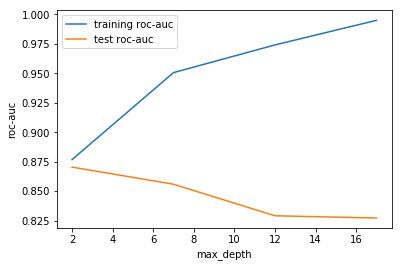

In [133]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()


as we increase the value of max_depth from 2 to 7 , train score increase but test score starts to decrease. The ensemble tries to overfit as we increase the max_depth up to 7.

Thus, controlling the depth of the tree between 2 and 7 will help reduce overfitting in the tree.

#### Tuning max_features

In [135]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'max_features': [4, 8, 14, 20, 24]}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [136]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.195254,0.085805,0.035227,0.004058,4,{'max_features': 4},0.828971,0.917447,0.847761,0.873187,...,0.863951,0.030221,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,7.570544,0.901904,0.030563,0.002235,8,{'max_features': 8},0.854266,0.873154,0.866803,0.866781,...,0.861387,0.009863,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,13.039779,0.920531,0.031098,0.002039,14,{'max_features': 14},0.860562,0.892196,0.879472,0.866803,...,0.870253,0.014121,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,19.430380,2.373282,0.035510,0.003663,20,{'max_features': 20},0.841486,0.904876,0.885834,0.866869,...,0.872842,0.021322,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,21.137388,2.295240,0.030435,0.001711,24,{'max_features': 24},0.847892,0.879505,0.860452,0.866803,...,0.865263,0.010687,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


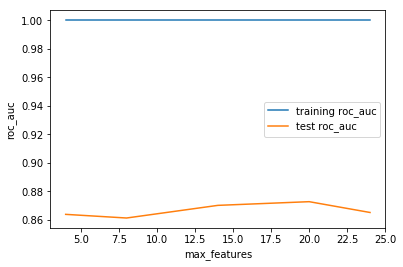

In [137]:

# plotting precision with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()


We can see here as we increase max features training score remains as 1 but test score increases till 20 features 
after that it decreases. We can tune it near 20

#### Tuning min_samples_leaf


The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [174]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_leaf': range(20, 100, 20)}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(20, 100, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [175]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.369451,3.929978,0.036723,0.006240,20,{'min_samples_leaf': 20},0.879087,0.929966,0.917255,0.910857,...,0.911940,0.017584,4,0.999690,0.999618,0.999689,0.999656,0.999642,0.999659,0.000028
1,30.236752,3.591306,0.040580,0.008126,40,{'min_samples_leaf': 40},0.884977,0.942329,0.916827,0.929655,...,0.921778,0.020203,3,0.999439,0.999295,0.999383,0.999365,0.999316,0.999360,0.000051
2,27.726849,4.707094,0.040900,0.011542,60,{'min_samples_leaf': 60},0.909880,0.948364,0.922717,0.935739,...,0.931599,0.013732,1,0.999248,0.999008,0.999059,0.999156,0.999021,0.999098,0.000091
3,26.925611,3.854461,0.038897,0.004761,80,{'min_samples_leaf': 80},0.903334,0.948378,0.916114,0.941966,...,0.931491,0.018362,2,0.999039,0.998890,0.998898,0.999009,0.998907,0.998949,0.000062


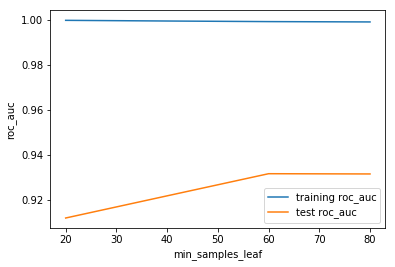

In [176]:
# plotting roc-auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

test score is increasing as we are increasing min_samples_leaf till 60 after that it decreases slightly.

#### Tuning min_samples_split

In [189]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_split': range(100, 500, 100)}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [190]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.356371,4.188318,0.039166,0.007305,100,{'min_samples_split': 100},0.885498,0.923501,0.897981,0.923547,...,0.909320,0.015134,4,0.999853,0.999769,0.999878,0.999785,0.999766,0.999810,0.000046
1,31.389677,3.829072,0.035776,0.002515,200,{'min_samples_split': 200},0.891568,0.935957,0.903815,0.923155,...,0.915333,0.015689,3,0.999688,0.999562,0.999632,0.999632,0.999509,0.999605,0.000062
2,30.878404,4.197411,0.036844,0.005792,300,{'min_samples_split': 300},0.909827,0.954619,0.922002,0.922681,...,0.926201,0.014996,2,0.999455,0.999379,0.999142,0.999320,0.999330,0.999325,0.000103
3,30.816475,4.053065,0.036437,0.005709,400,{'min_samples_split': 400},0.915638,0.954286,0.921660,0.941251,...,0.932194,0.013940,1,0.999181,0.999133,0.998899,0.999120,0.999242,0.999115,0.000116


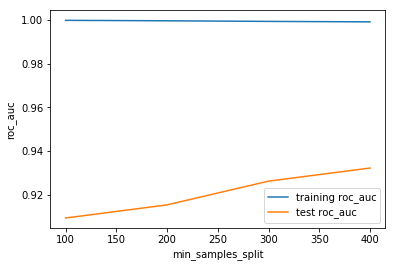

In [191]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

We can see here as we increase min_samples_split test roc increases upto min_samples_split 500 after that it starts decreasing. Now we can fine tune it between 500 to 600

#### Grid Search to Find Optimal Hyperparameters


In [178]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [60,90,10],
    'min_samples_split': [450, 500, 550],
    'max_features': [18,20,22]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed: 24.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [60, 90, 10], 'min_samples_split': [450, 500, 550], 'max_features': [18, 20, 22]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [179]:
# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc_auc of 0.9404995230634168 using {'max_depth': 6, 'max_features': 20, 'min_samples_leaf': 60, 'min_samples_split': 450}


#### Fitting the final model with the best parameters obtained from grid search.

In [201]:
# model with the best hyperparameters
dt = DecisionTreeClassifier(max_depth=6,
                            max_features=20,
                            min_samples_leaf=60, 
                            min_samples_split= 450
                            )

# fit
dt.fit(X_train, y_train)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))


0.8873857998461061


we are not able to improve auc score on test data above 0.89 with Decision tree on unbalanced data set

## Random Forest Model

### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [2]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [203]:
# fit
rfc.fit(X_train,y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
# Making predictions
predictions = rfc.predict(X_test)

In [206]:
# Let's check the roc_auc value of our default model
print(roc_auc_score(y_test,predictions))

0.8775158487705719


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [207]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

suppress warnings

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc", return_train_score=True)
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.013905,0.296267,0.079747,0.007618,2,{'max_depth': 2},0.891928,0.942461,0.911079,0.923637,...,0.916786,0.016495,4,0.926581,0.910498,0.906027,0.918649,0.903172,0.912986,0.008577
1,15.947733,0.230158,0.109497,0.027547,7,{'max_depth': 7},0.944583,0.956152,0.938089,0.955508,...,0.952140,0.009843,2,0.977922,0.951035,0.972969,0.977820,0.972931,0.970535,0.009996
2,27.232499,1.387840,0.114841,0.007183,12,{'max_depth': 12},0.952170,0.987698,0.941914,0.962460,...,0.962927,0.015664,1,0.996124,0.995831,0.995833,0.995685,0.992849,0.995264,0.001216
3,31.346250,0.916774,0.136293,0.011507,17,{'max_depth': 17},0.930841,0.959518,0.915308,0.962456,...,0.941510,0.017707,3,0.999999,0.999994,0.999996,0.999880,0.999582,0.999890,0.000160


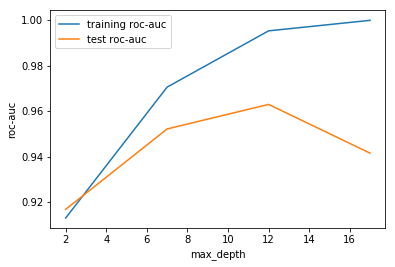

In [209]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators
Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall auc. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [13]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 50, 10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 50, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [14]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.973548,0.089122,0.069818,0.008913,10,{'n_estimators': 10},0.914490,0.950187,0.925921,0.927036,...,0.927508,0.012201,4,0.959408,0.931855,0.958006,0.932924,0.931879,0.942814,0.012990
1,15.878444,0.139482,0.110740,0.001413,20,{'n_estimators': 20},0.883360,0.949991,0.937397,0.946849,...,0.937575,0.029152,3,0.935532,0.930474,0.948777,0.962130,0.958903,0.947163,0.012476
2,23.958008,0.330145,0.161299,0.004840,30,{'n_estimators': 30},0.939644,0.953124,0.965325,0.955635,...,0.956138,0.009828,2,0.965177,0.940131,0.973289,0.961825,0.961944,0.960473,0.010992
3,31.763847,0.359561,0.197129,0.007620,40,{'n_estimators': 40},0.929572,0.977963,0.957979,0.954281,...,0.957352,0.016117,1,0.968050,0.954358,0.960073,0.964910,0.962236,0.961925,0.004631


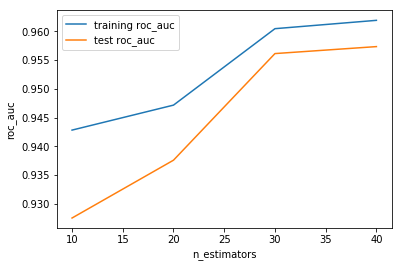

In [15]:
# plotting auc score with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.legend()
plt.show()


Apparently, the training and test scores both seem to increase as we increase number of trees in ensemble, and the model's performance increased a lot even with 40 trees

### Tuning max_features
Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [19]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 22, 29]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True)
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 22, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [20]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.660682,0.159967,0.069437,0.006309,4,{'max_features': 4},0.879444,0.982853,0.942394,0.972428,...,0.947172,0.036483,1,0.941340,0.952848,0.961221,0.963631,0.958532,0.955515,0.007944
1,13.093047,0.801264,0.069994,0.006088,8,{'max_features': 8},0.884801,0.946626,0.910359,0.927854,...,0.918344,0.020461,4,0.937147,0.934119,0.924452,0.940460,0.924549,0.932145,0.006557
2,22.725369,0.606834,0.068318,0.003408,14,{'max_features': 14},0.879516,0.936336,0.944885,0.947095,...,0.926162,0.024813,2,0.929984,0.918635,0.951909,0.938991,0.922379,0.932380,0.011998
3,34.059606,1.676199,0.072795,0.005906,22,{'max_features': 22},0.879589,0.936517,0.922801,0.923739,...,0.917130,0.019471,5,0.925276,0.918838,0.933842,0.920356,0.920820,0.923826,0.005447
4,43.479837,0.195195,0.072641,0.005664,29,{'max_features': 29},0.879510,0.936564,0.919428,0.923742,...,0.918627,0.020550,3,0.928399,0.909415,0.955006,0.923538,0.939232,0.931118,0.015312


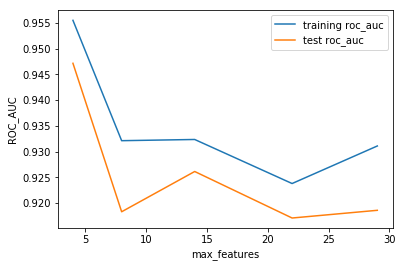

In [21]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("ROC_AUC")
plt.legend()
plt.show()

lower number of features are doing better job

### Tuning min_samples_leaf

In [22]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(10, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.530321,0.717946,0.113596,0.013927,10,{'min_samples_leaf': 10},0.928133,0.960739,0.934213,0.947031,...,0.943345,0.011328,8,0.999832,0.999796,0.999825,0.999796,0.999841,0.999818,0.000019
1,27.812096,2.136598,0.112224,0.004558,60,{'min_samples_leaf': 60},0.954542,0.982996,0.966490,0.955881,...,0.963071,0.010875,6,0.999024,0.998293,0.998796,0.998547,0.998641,0.998660,0.000244
2,25.843787,1.275721,0.114273,0.004930,110,{'min_samples_leaf': 110},0.937346,0.983516,0.942768,0.964457,...,0.961476,0.018678,7,0.997802,0.997810,0.997557,0.998060,0.998027,0.997851,0.000182
3,25.596522,1.038036,0.114188,0.006323,160,{'min_samples_leaf': 160},0.947809,0.981564,0.963379,0.962691,...,0.965133,0.011000,5,0.997423,0.996578,0.996963,0.997316,0.997026,0.997061,0.000297
4,23.417127,1.747487,0.108986,0.007384,210,{'min_samples_leaf': 210},0.944964,0.987958,0.961701,0.961668,...,0.968761,0.016654,3,0.997238,0.996623,0.996571,0.995912,0.995750,0.996419,0.000537


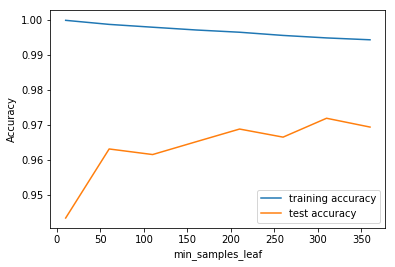

In [24]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

In [25]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True)
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.310297,0.871041,0.075623,0.009984,200,{'min_samples_split': 200},0.935057,0.978645,0.942228,0.963053,...,0.958748,0.017349,4,0.999499,0.999405,0.999560,0.999478,0.999509,0.999490,0.000051
1,19.102401,0.846183,0.073238,0.005252,250,{'min_samples_split': 250},0.945994,0.977253,0.922462,0.954994,...,0.955041,0.020077,6,0.999421,0.999469,0.999474,0.999501,0.999298,0.999433,0.000072
2,19.165268,1.115591,0.074600,0.008012,300,{'min_samples_split': 300},0.952140,0.983501,0.945541,0.959191,...,0.960022,0.012836,3,0.999458,0.999325,0.999280,0.999453,0.999452,0.999393,0.000076
3,19.056405,0.994357,0.072811,0.005816,350,{'min_samples_split': 350},0.965243,0.983336,0.947544,0.968405,...,0.963886,0.012234,2,0.999402,0.999355,0.999314,0.999320,0.999194,0.999317,0.000069
4,19.420787,0.742349,0.079057,0.009785,400,{'min_samples_split': 400},0.958462,0.975232,0.925036,0.954003,...,0.955936,0.017080,5,0.999320,0.999017,0.999186,0.999203,0.999051,0.999155,0.000110


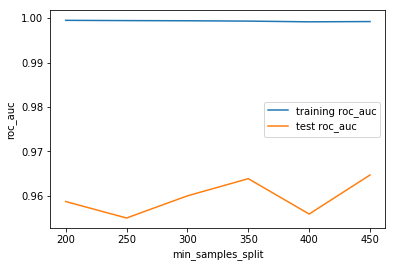

In [27]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [28]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(500, 1000, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True)
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(500, 1000, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.870440,3.701971,0.110904,0.017872,500,{'min_samples_split': 500},0.949661,0.976888,0.960155,0.944808,...,0.960449,0.012142,4,0.999187,0.999280,0.998870,0.999118,0.999155,0.999122,0.000137
1,29.975067,1.799286,0.114935,0.007735,600,{'min_samples_split': 600},0.935440,0.976321,0.949584,0.955975,...,0.958958,0.016088,5,0.999123,0.998796,0.999093,0.999032,0.999161,0.999041,0.000129
2,29.235707,0.757724,0.114121,0.007299,700,{'min_samples_split': 700},0.946694,0.982105,0.955233,0.974045,...,0.965234,0.012761,3,0.999105,0.998759,0.998874,0.998840,0.998784,0.998873,0.000123
3,30.547503,1.689663,0.116828,0.007785,800,{'min_samples_split': 800},0.952630,0.981253,0.966192,0.970232,...,0.968250,0.009257,1,0.998961,0.998971,0.998764,0.998926,0.998906,0.998906,0.000074
4,32.243435,0.510716,0.123400,0.004701,900,{'min_samples_split': 900},0.959293,0.982116,0.951773,0.962662,...,0.965535,0.010499,2,0.999142,0.998748,0.999049,0.999035,0.998632,0.998921,0.000196


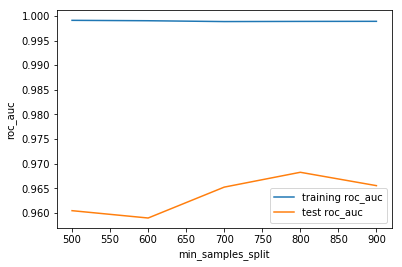

In [30]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50,100,150], 
    'max_features': [4, 8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 103.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 128.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [50, 100, 150], 'max_features': [4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc_auc of 0.9991178213259014 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 50}


#### Fit the model with best hyperparameters

In [127]:
# model with the best hyperparameters
dt = RandomForestClassifier(max_depth=8,
                            max_features=8,
                            min_samples_leaf=100, 
                            min_samples_split= 400,
                            n_estimators=50
                            )

# fit
dt.fit(X_train, y_train)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.805981762429226


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Oversampling

In [11]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler( random_state=42)
X_ros, y_ros = ros.fit_sample(X_train, y_train)

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Logistic regression with lasso regularization

In [43]:
# Logistic Regression with Lasso regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [.00001,.0001,0.001]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_ros, y_ros) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.726170,1.245177,0.038192,0.047742,1e-05,{'alpha': 1e-05},0.709249,0.703096,0.707122,0.701862,...,0.705287,0.002669,1,0.704376,0.705913,0.704912,0.706219,0.705415,0.705367,0.000665
1,15.456973,1.032294,0.010575,0.000488,0.0001,{'alpha': 0.0001},0.709250,0.703099,0.707113,0.701874,...,0.705286,0.002665,2,0.704375,0.705912,0.704910,0.706217,0.705413,0.705366,0.000665
2,10.203513,0.770173,0.008381,0.004214,0.001,{'alpha': 0.001},0.709150,0.703026,0.706917,0.701889,...,0.705169,0.002621,3,0.704256,0.705793,0.704792,0.706098,0.705295,0.705247,0.000665


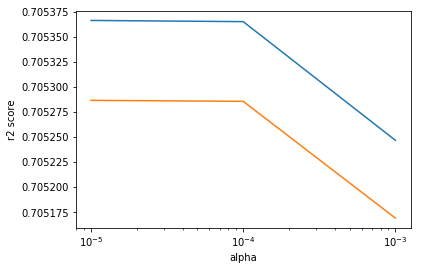

In [45]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [48]:
# model with optimal alpha 10^-4
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_ros, y_ros)

y_test_pred = lm.predict(X_test)
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9715542203093955


By applying Logistic regression on simple oversampled data auc score obtained on train data: 0.99 test data: 0.97

### Decision Tree model

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_ros, y_ros)

# Making predictions on test data
predictions_test = dt_default.predict(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions_test))


0.8671622876781551


### Hyper parameter tuning

#### Tuning max_depth

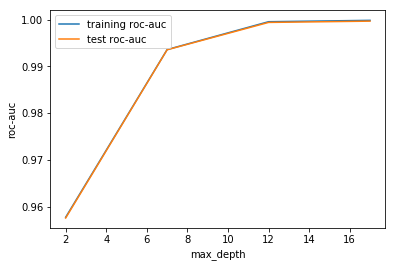

In [50]:
# Hypertune the parameters to get optimum train and test recall

# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5)
    }
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds,return_train_score=True)
grid_search.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = grid_search.cv_results_


# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()


#### Tuning max_features

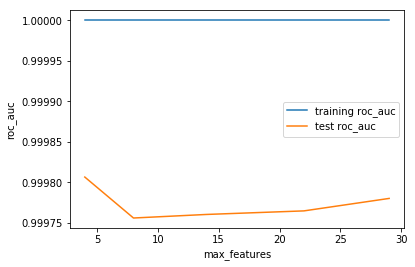

In [51]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'max_features': [4, 8, 14, 22, 29]}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()


# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()



#### Tuning min_samples_leaf

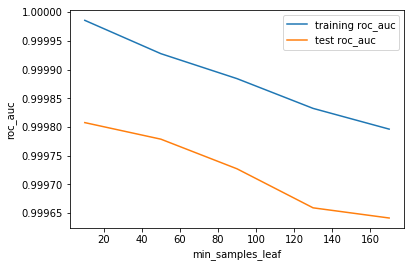

In [54]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_leaf': range(10, 200, 40)}

# Create a decision tree based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = grid_search.cv_results_

# plotting roc-auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()



#### Tuning min_samples_split

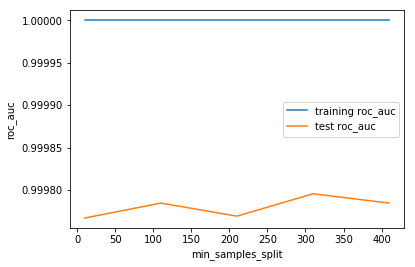

In [55]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_split': range(10, 500, 100)}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = grid_search.cv_results_


# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Finding set of best hyper parameters 

In [56]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': [40,50],
    'min_samples_split': [300,500],
    'max_features': [4,6]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 12], 'min_samples_leaf': [40, 50], 'min_samples_split': [300, 500], 'max_features': [4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [57]:
# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)


We can get roc_auc of 0.9995037345897396 using {'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 40, 'min_samples_split': 500}


#### Fitting the final model with the best parameters obtained from grid search and predict auc score for test data


In [58]:

# model with the best hyperparameters
dt = DecisionTreeClassifier(max_depth=12,
                            max_features=4,
                            min_samples_leaf=40, 
                            min_samples_split= 500
                            )

# fit
dt.fit(X_ros, y_ros)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))


0.922135018892194


By applying Decision tree on simple oversampled balanced data train auc: 0.99 and test auc: 0.92

### Random Forest 

#### Default model

In [59]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_ros,y_ros)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the roc_auc value of our default model
print(roc_auc_score(y_test,predictions))

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8928131783101535


#### Hyper parameter tuning

#### Tuning max_depth

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

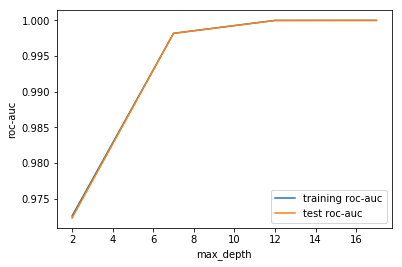

In [12]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc", return_train_score=True)
rf.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()

#### Tuning n_estimators

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


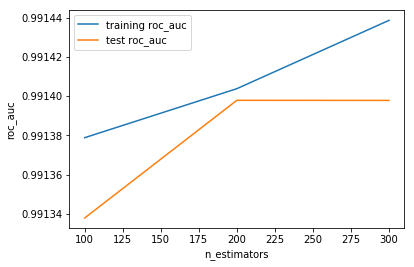

In [13]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 400, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting auc score with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.legend()
plt.show()


#### Tuning max_features

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

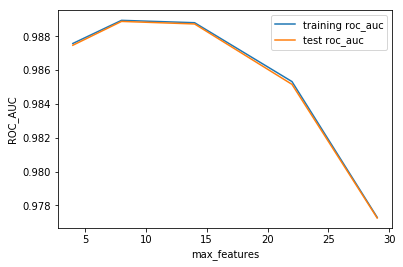

In [14]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 22, 29]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True)
rf.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("ROC_AUC")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

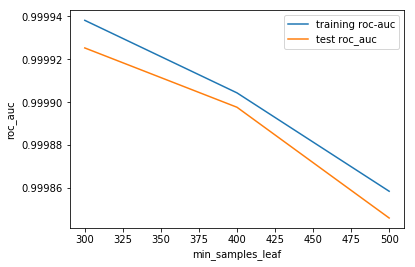

In [19]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(300, 600, 100)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                  return_train_score=True)
rf.fit(X_ros, y_ros)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Fine tune hyperparameters

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,14],
    'min_samples_leaf': [350,400,450],
    'n_estimators': [180,200,220], 
    'max_features': [6,8,10]
}
# Create a based model/
rf= RandomForestClassifier():
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc",return_train_score=True

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 102.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 506.0min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 662.7min finished


We can get roc_auc of 0.9986304742559936 using {'max_depth': 14, 'max_features': 6, 'min_samples_leaf': 350, 'n_estimators': 200}


#### Fitting the model with best parameters obtained by grid search

In [33]:
from sklearn.metrics import roc_auc_score
# model with the best hyperparameters
dt = RandomForestClassifier(max_depth=14,
                            max_features=6,
                            min_samples_leaf=350, 
                            n_estimators=200
                            )

# fit
dt.fit(X_ros, y_ros)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.9427168869798904


By applying random forest on simple oversampled  data we are getting the optimum roc_auc value for train data : 0.99 and for test data 0.94

### XGBoost

In [40]:
# fit model on balanced training data with default hyperparameters
model = XGBClassifier()
model.fit(X_ros, y_ros)


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28'] ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
expected f25, f0, f5, f28, f2, f8, f13, f14, f12, f11, f17, f7, f4, f20, f18, f6, f15, f27, f19, f22, f26, f23, f9, f24, f16, f10, f1, f3, f21 in input data
training data did not have the following fields: V23, V9, V22, V20, V5, V3, V7, V10, V12, V18, V17, V24, Amount, V25, V26, V14, V4, V6, V11, V19, V27, V28, V15, V1, V13, V8, V2, V16, V21

In [41]:
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test.values)

In [42]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.76%


The roc_auc in this case is about 97 % with default hyperparameters. Let's try changing the hyperparameters

#### hyperparameter tuning with XGBoost

In [43]:
from xgboost import XGBClassifier

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [44]:
# fit the model
model_cv.fit(X_ros, y_ros)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 20.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=2,
       min_child_weig...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [45]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,61.449273,1.017434,0.638156,0.027000,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999921,0.999848,0.999911,0.999893,0.000032,5,0.999908,0.999929,0.999900,0.999912,1.220652e-05
1,74.990209,8.252381,0.507699,0.030743,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999928,0.999856,0.999920,0.999901,0.000032,4,0.999907,0.999920,0.999906,0.999911,6.509253e-06
2,71.480116,2.000954,0.479753,0.014259,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999914,0.999858,0.999907,0.999893,0.000025,6,0.999892,0.999928,0.999892,0.999904,1.709563e-05
3,56.171483,0.477261,0.480236,0.009789,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999992,0.999955,0.999984,0.999977,0.000016,3,0.999998,0.999998,0.999999,0.999999,6.057011e-07
4,66.760305,1.137548,0.477689,0.015619,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999990,0.999971,0.999980,0.999981,0.000008,1,1.000000,0.999998,0.999999,0.999999,8.445025e-07
5,70.304068,0.478812,0.540213,0.039610,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999998,0.999966,0.999968,0.999977,0.000014,2,0.999998,0.999999,1.000000,0.999999,7.485362e-07


In [48]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,61.449273,1.017434,0.638156,0.027000,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999921,0.999848,0.999911,0.999893,0.000032,5,0.999908,0.999929,0.999900,0.999912,1.220652e-05
1,74.990209,8.252381,0.507699,0.030743,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999928,0.999856,0.999920,0.999901,0.000032,4,0.999907,0.999920,0.999906,0.999911,6.509253e-06
2,71.480116,2.000954,0.479753,0.014259,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999914,0.999858,0.999907,0.999893,0.000025,6,0.999892,0.999928,0.999892,0.999904,1.709563e-05
3,56.171483,0.477261,0.480236,0.009789,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999992,0.999955,0.999984,0.999977,0.000016,3,0.999998,0.999998,0.999999,0.999999,6.057011e-07
4,66.760305,1.137548,0.477689,0.015619,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999990,0.999971,0.999980,0.999981,0.000008,1,1.000000,0.999998,0.999999,0.999999,8.445025e-07


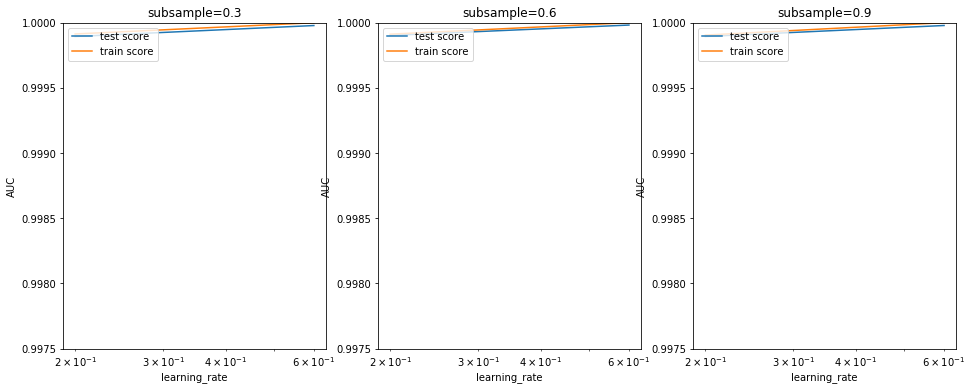

In [53]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.9975, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [54]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method=None, validate_parameters=False,
       verbosity=None)

In [55]:
# predict
y_pred = model.predict_proba(X_test.values)
y_pred[:10]

array([[9.9999857e-01, 1.4129593e-06],
       [9.9999976e-01, 2.5437600e-07],
       [9.9999541e-01, 4.5769348e-06],
       [9.9999994e-01, 5.7021126e-08],
       [9.9998128e-01, 1.8706023e-05],
       [9.9999833e-01, 1.6711829e-06],
       [9.9999976e-01, 2.1782454e-07],
       [9.9999994e-01, 3.0803687e-08],
       [9.9999887e-01, 1.1345353e-06],
       [9.9999964e-01, 3.7611261e-07]], dtype=float32)

In [57]:
# roc_auc
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

0.977587232839112

roc-auc obtained by XGBoost with simple random oversampling balncing : 0.98

## Balancing data set with SMOTE

### Print the class distribution after applying SMOTE 

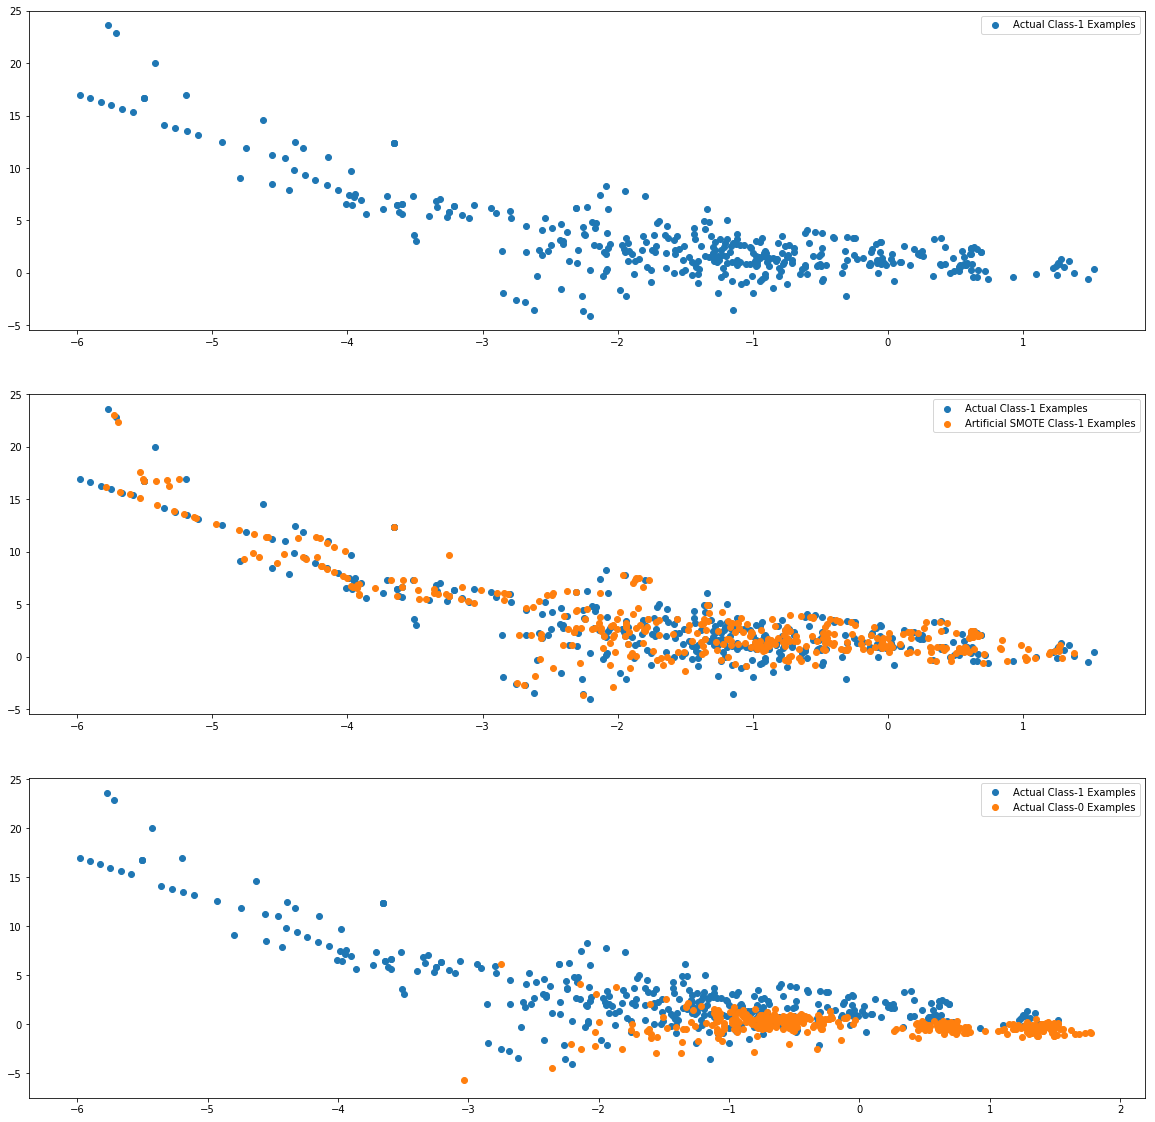

In [61]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression

In [62]:
# Logistic Regression with Lasso regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [.00001,.0001,0.001]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_smote, y_train_smote) 



Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.701876,0.397178,0.012490,0.006245,1e-05,{'alpha': 1e-05},0.706023,0.705588,0.708112,0.705015,...,0.706619,0.001359,1,0.706870,0.706983,0.706349,0.707116,0.706292,0.706722,0.000338
1,12.454659,0.292128,0.012899,0.002362,0.0001,{'alpha': 0.0001},0.706026,0.705587,0.708110,0.705023,...,0.706618,0.001353,2,0.706869,0.706981,0.706347,0.707114,0.706290,0.706720,0.000338
2,10.474288,0.914672,0.008634,0.007173,0.001,{'alpha': 0.001},0.705931,0.705457,0.707976,0.704980,...,0.706488,0.001299,3,0.706734,0.706847,0.706213,0.706979,0.706157,0.706586,0.000337


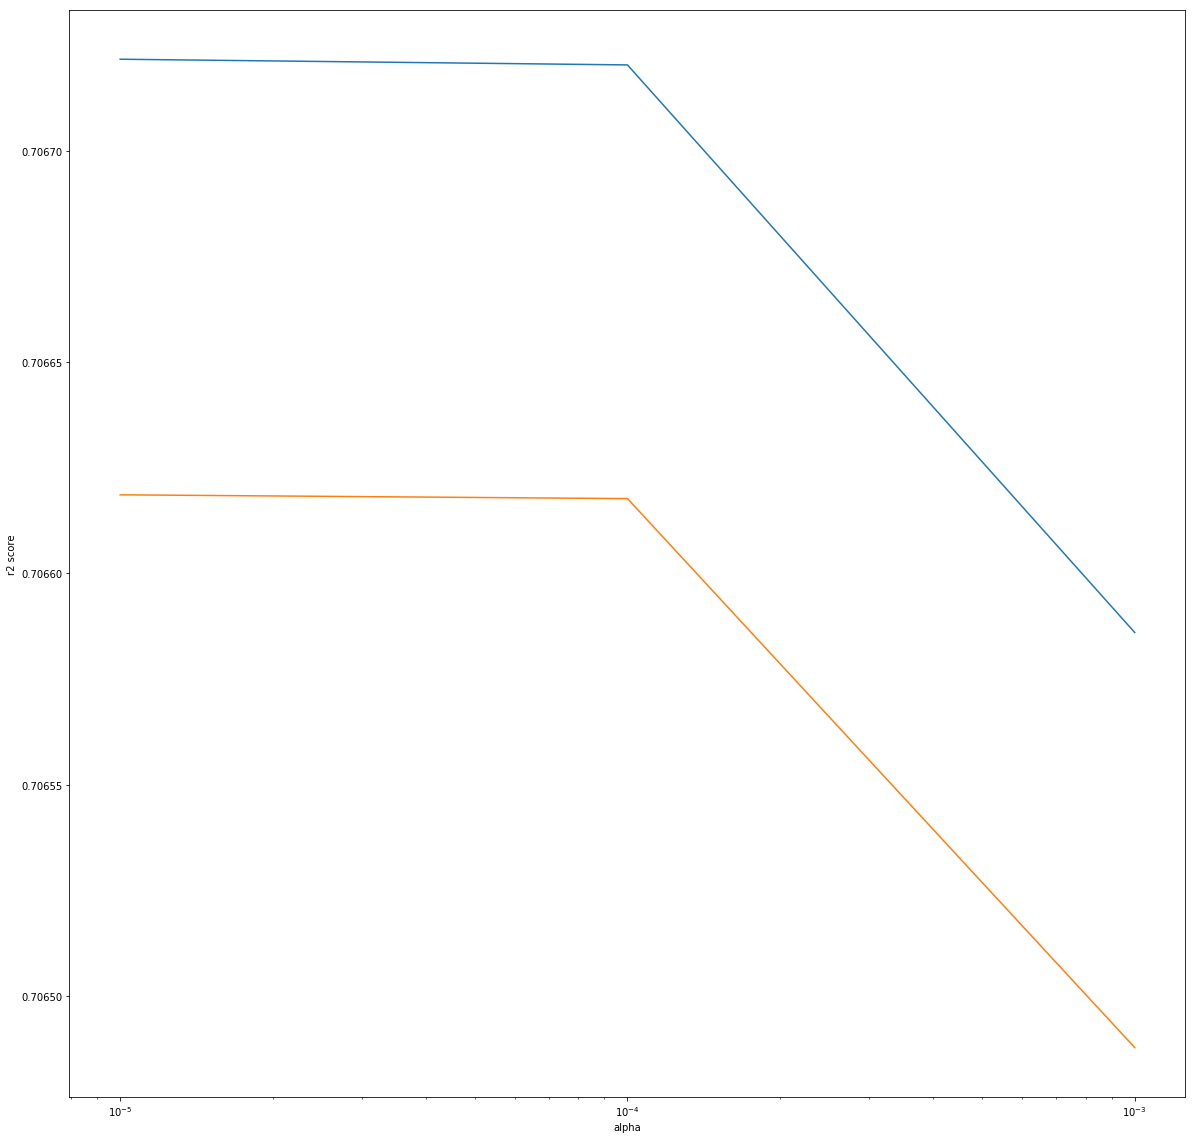

In [64]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [65]:
# model with optimal alpha 10^-4
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train_smote, y_train_smote)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
# model evaluation
y_train_pred =lm.predict(X_train_smote)
print(metrics.roc_auc_score(y_train_smote, y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.roc_auc_score(y_test, y_test_pred))

0.982162286371269
0.9707800853881225


train roc: 0.98 and test roc: 0.97

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train_smote, y_train_smote)

# Making predictions on test data
predictions_test = dt_default.predict(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions_test))

0.9119639555315654


#### Hyperparameter tuning

#### Tuning max_depth

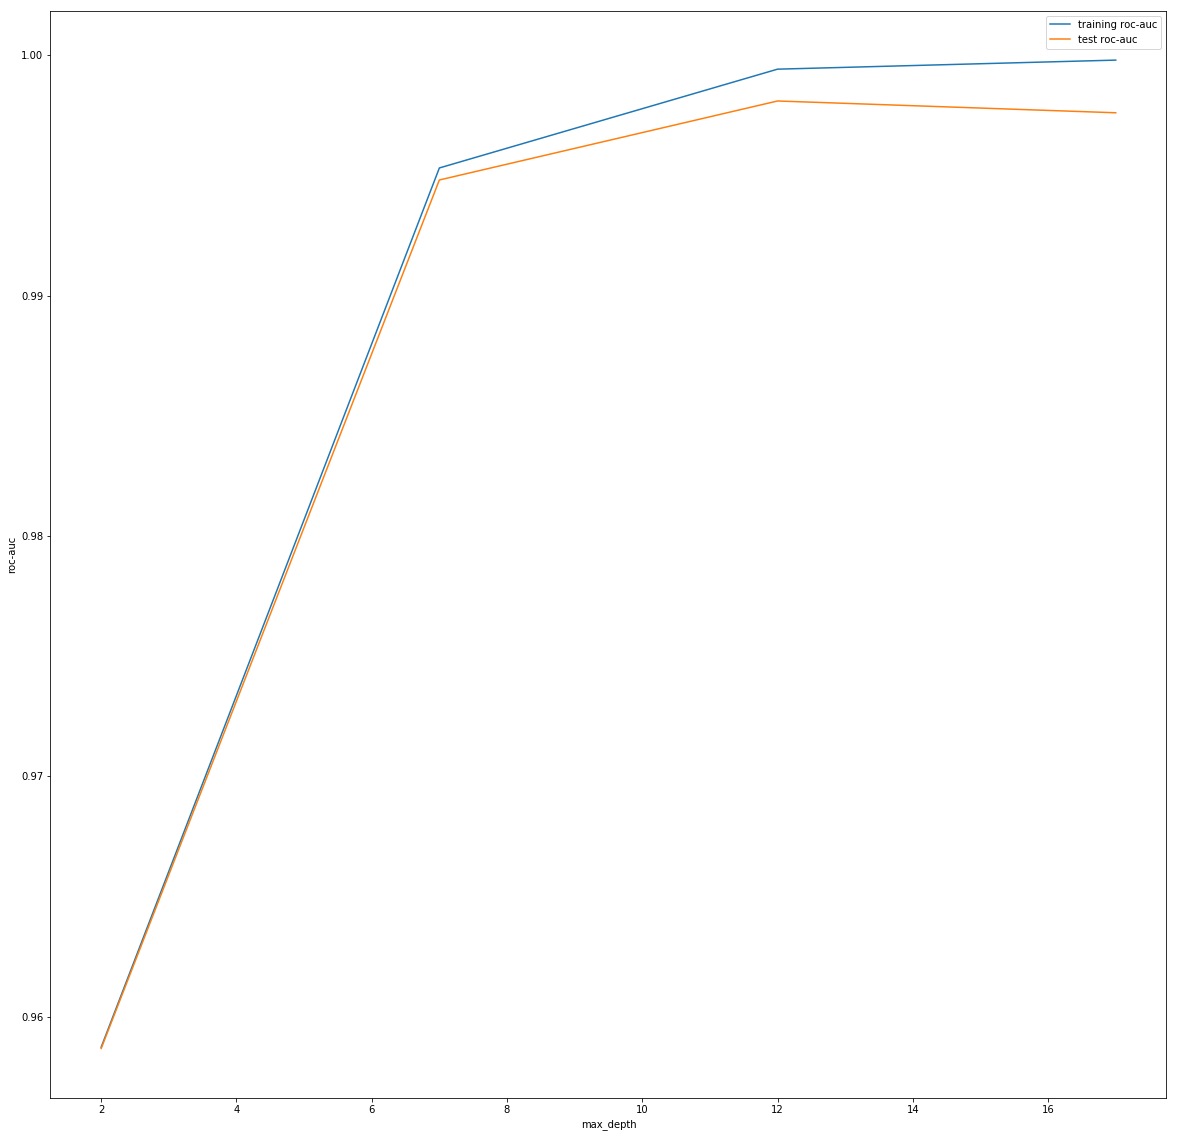

In [68]:
# Hypertune the parameters to get optimum train and test recall

# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5)
    }
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds,return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = grid_search.cv_results_


# plotting accuracies with max_depth
plt.figure(figsize=(8,6))

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()

#### Tuning max-features

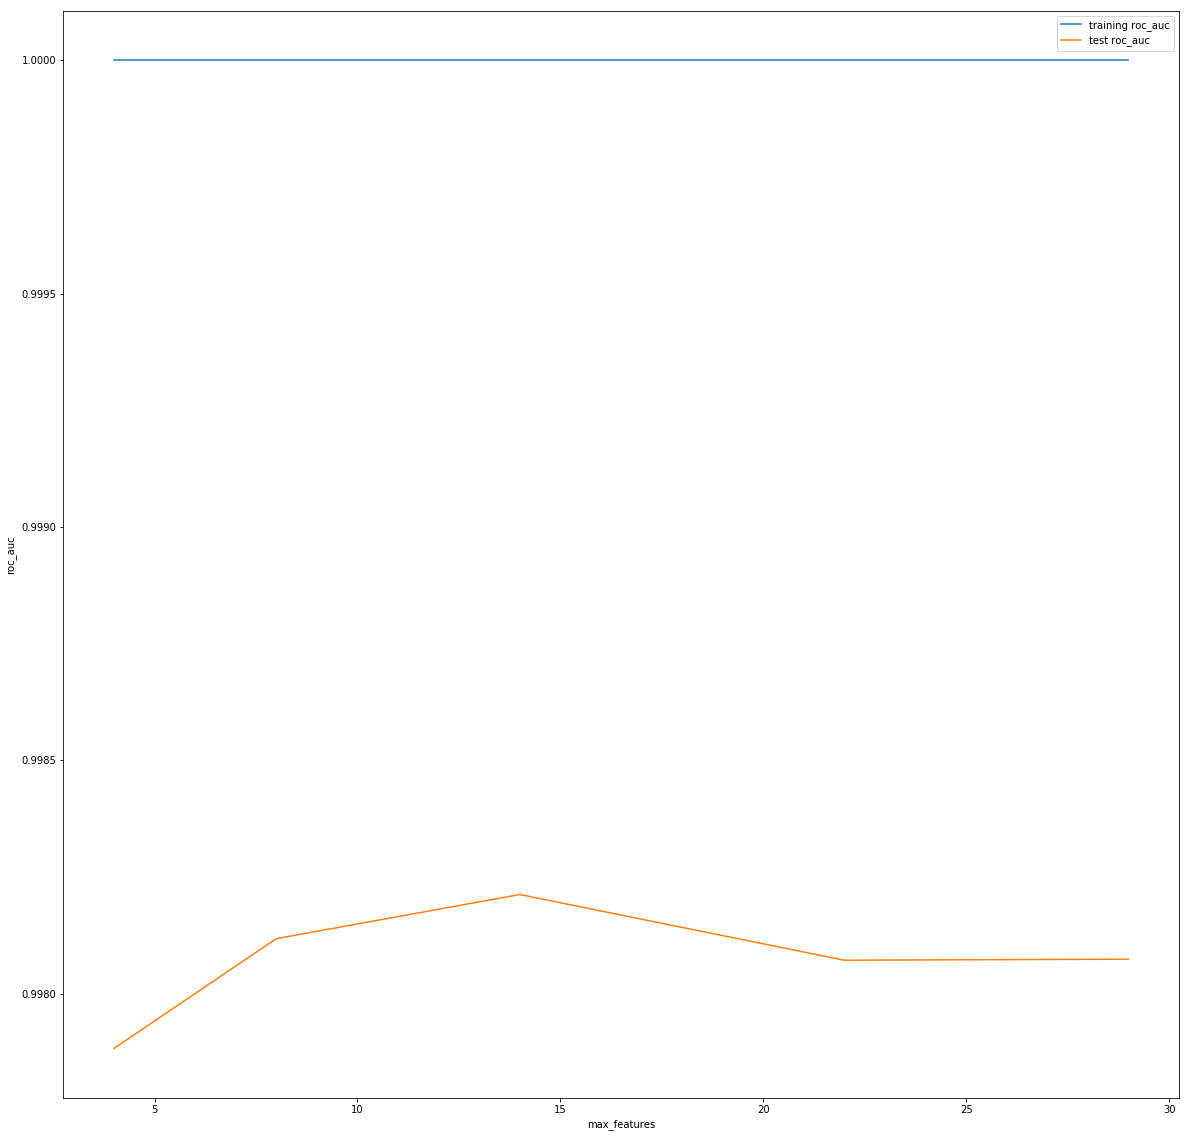

In [69]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'max_features': [4, 8, 14, 22, 29]}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()


# plotting roc_auc with max_features
plt.figure(figsize=(8,6))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

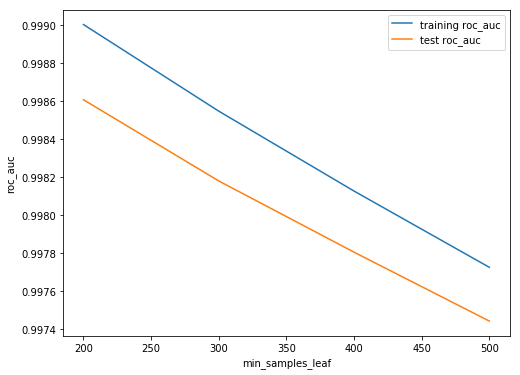

In [70]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_leaf': range(200, 600, 100)}

# Create a decision tree based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = grid_search.cv_results_

# plotting roc-auc with min_samples_leaf
plt.figure(figsize=(8,6))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

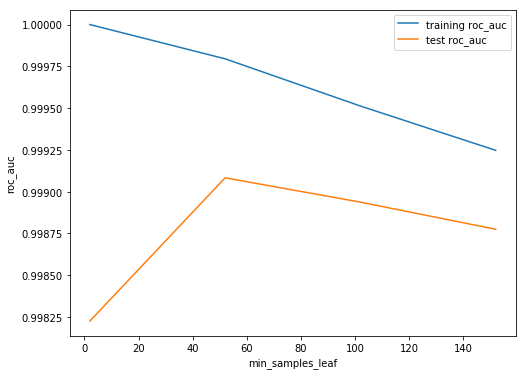

In [72]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_leaf': range(2, 200, 50)}

# Create a decision tree based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = grid_search.cv_results_

# plotting roc-auc with min_samples_leaf
plt.figure(figsize=(8,6))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Tuning min_samples_split

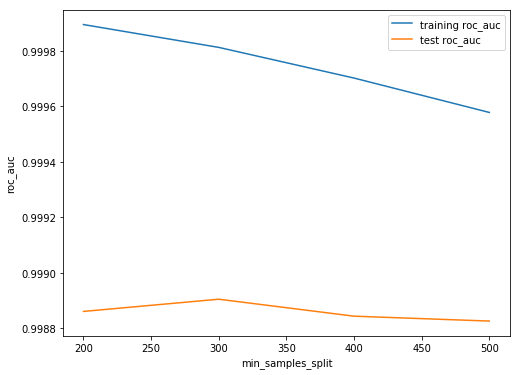

In [71]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid  = {'min_samples_split': range(200, 600, 100)}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='roc_auc', cv=n_folds, return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = grid_search.cv_results_


# plotting roc_auc with min_samples_split
plt.figure(figsize=(8,6))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Finding set of best hyperparameters

In [73]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,7],
    'min_samples_leaf': [60,65],
    'min_samples_split': [300,320],
    'max_features': [14,18]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 7], 'min_samples_leaf': [60, 65], 'min_samples_split': [300, 320], 'max_features': [14, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [74]:
# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc_auc of 0.9945114184422608 using {'max_depth': 7, 'max_features': 18, 'min_samples_leaf': 60, 'min_samples_split': 320}


In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,8],
    'min_samples_leaf': [52,60],
    'min_samples_split': [320,330],
    'max_features': [18,20]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.8min finished


We can get roc_auc of 0.9962184839546757 using {'max_depth': 8, 'max_features': 20, 'min_samples_leaf': 52, 'min_samples_split': 320}


In [76]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': [52,55],
    'min_samples_split': [320,325],
    'max_features': [20,22]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.6min finished


We can get roc_auc of 0.9981722028576501 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 55, 'min_samples_split': 325}


#### Fitting the model with best hyperparameter

In [77]:
# model with the best hyperparameters
dt = DecisionTreeClassifier(max_depth=10,
                            max_features=20,
                            min_samples_leaf=55, 
                            min_samples_split= 325
                            )

# fit
dt.fit(X_train_smote, y_train_smote)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.9286988360341323


### Random Forest

In [78]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_smote,y_train_smote)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the roc_auc value of our default model
print(roc_auc_score(y_test,predictions))

0.9182530391166033


#### Hyperparameter tuning

#### Tuning max_depth

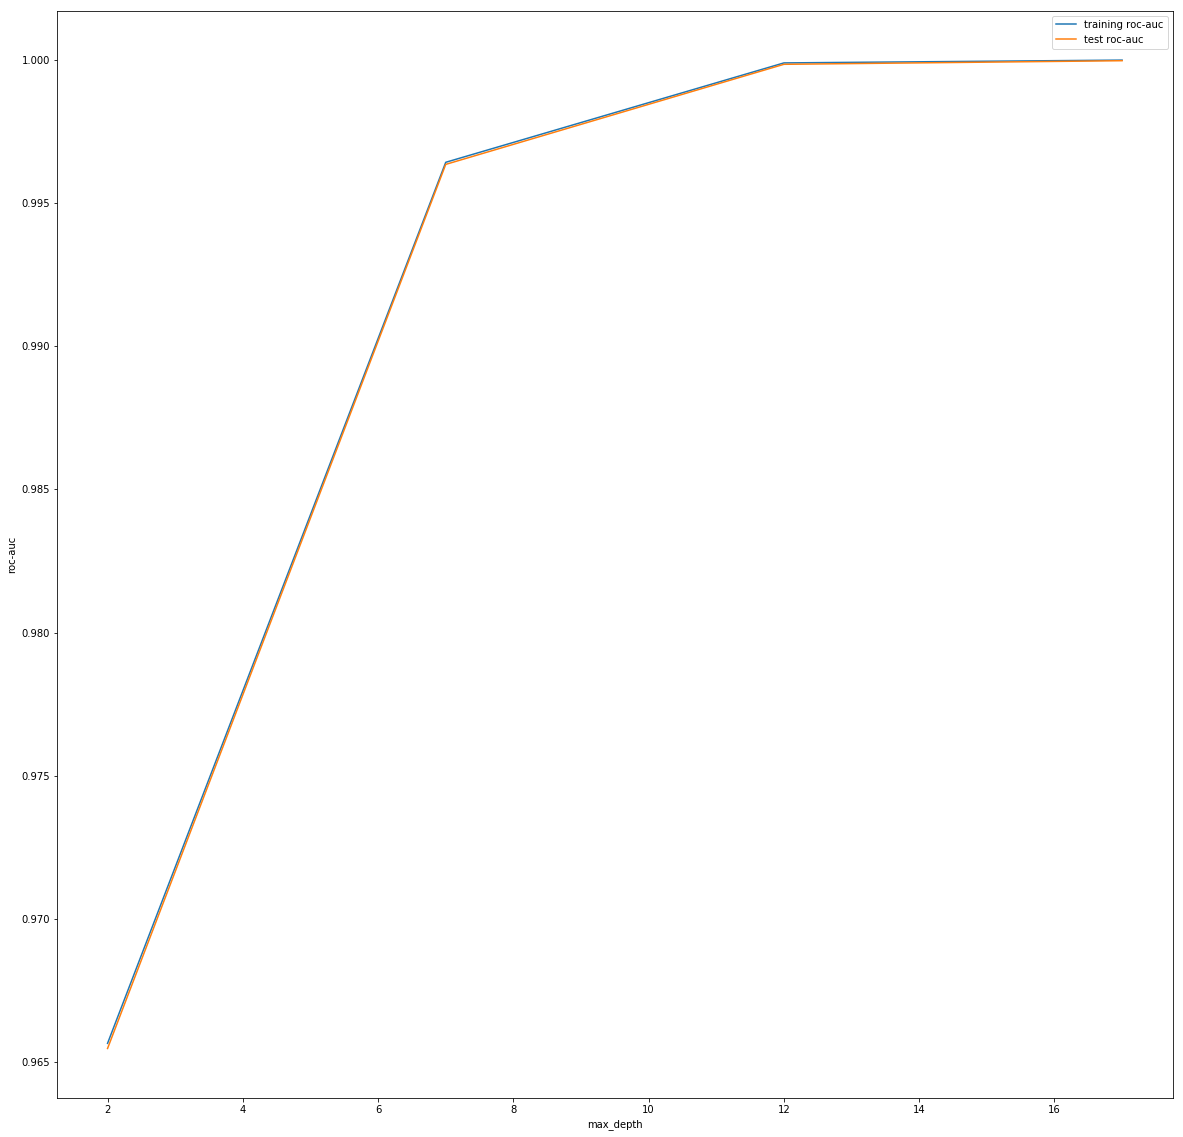

In [79]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc", return_train_score=True)
rf.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc-auc")
plt.xlabel("max_depth")
plt.ylabel("roc-auc")
plt.legend()
plt.show()

#### Tuning n_estimators

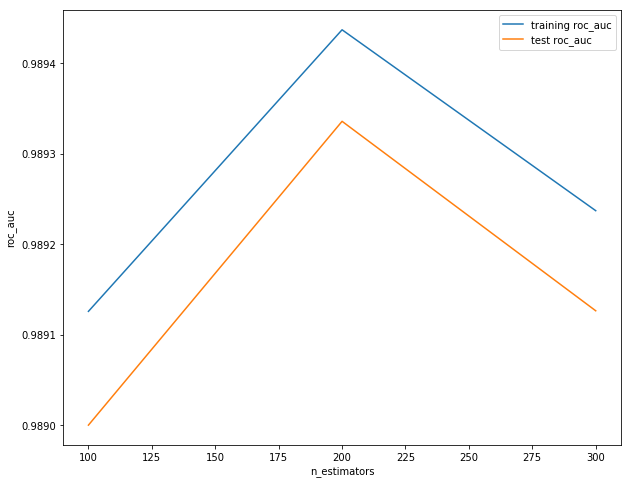

In [81]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 400, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting auc score with n_estimators
plt.figure(figsize=(10,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.legend()
plt.show()


#### Tuning max_features

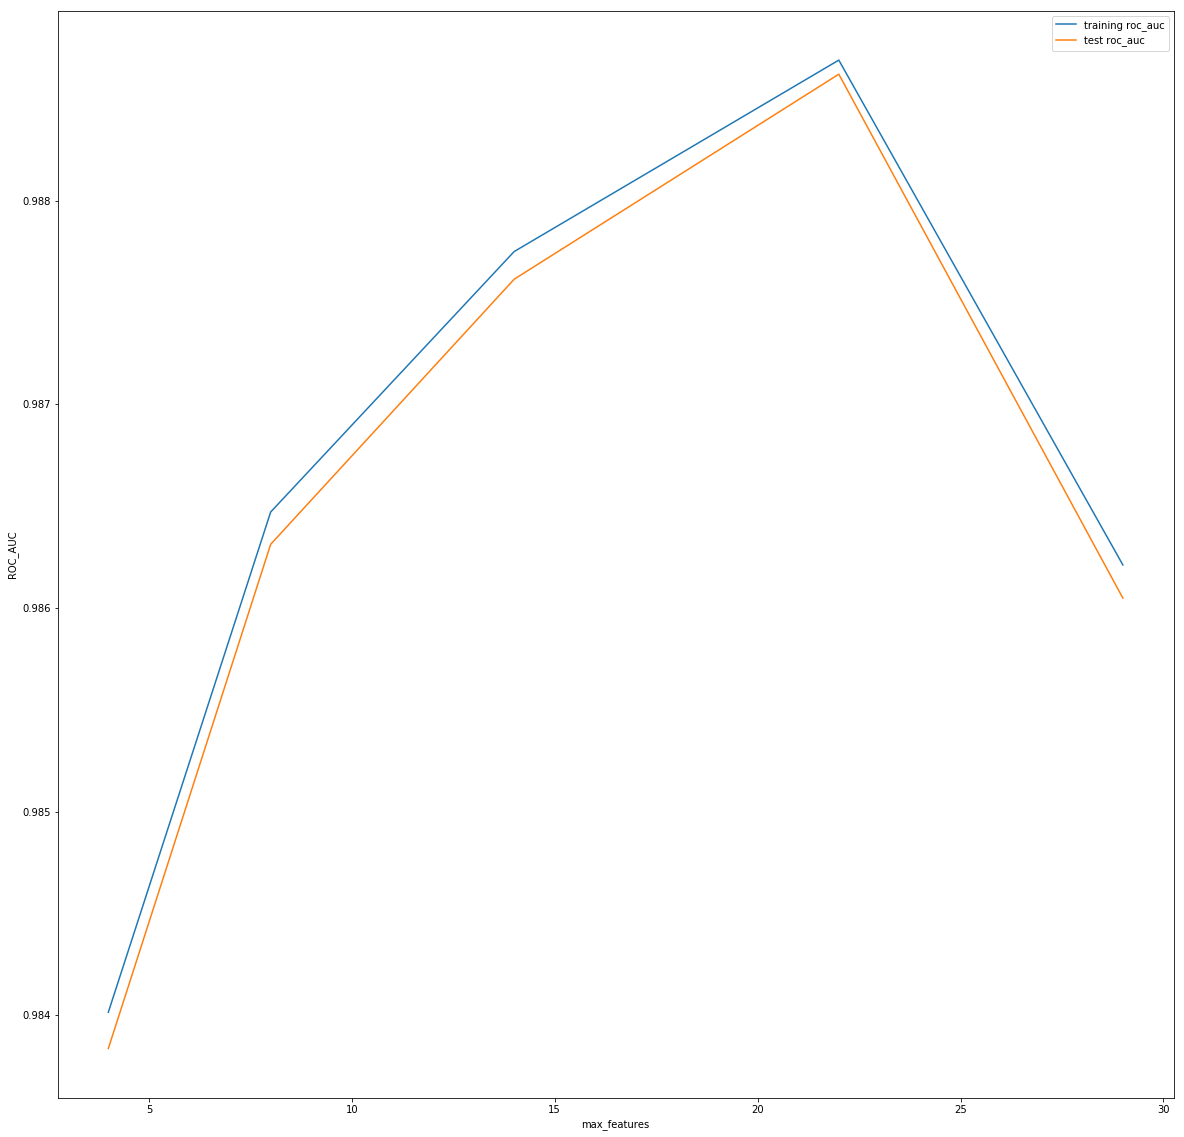

In [80]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 22, 29]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True)
rf.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("ROC_AUC")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

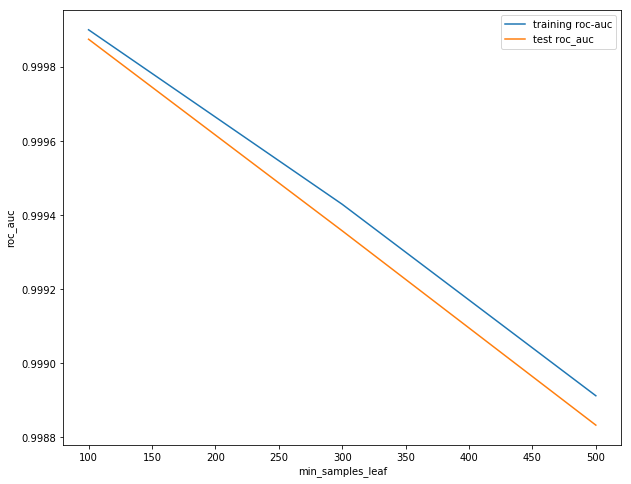

In [82]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 200)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                  return_train_score=True)
rf.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with min_samples_leaf
plt.figure(figsize=(10,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Tuning min_samples_split

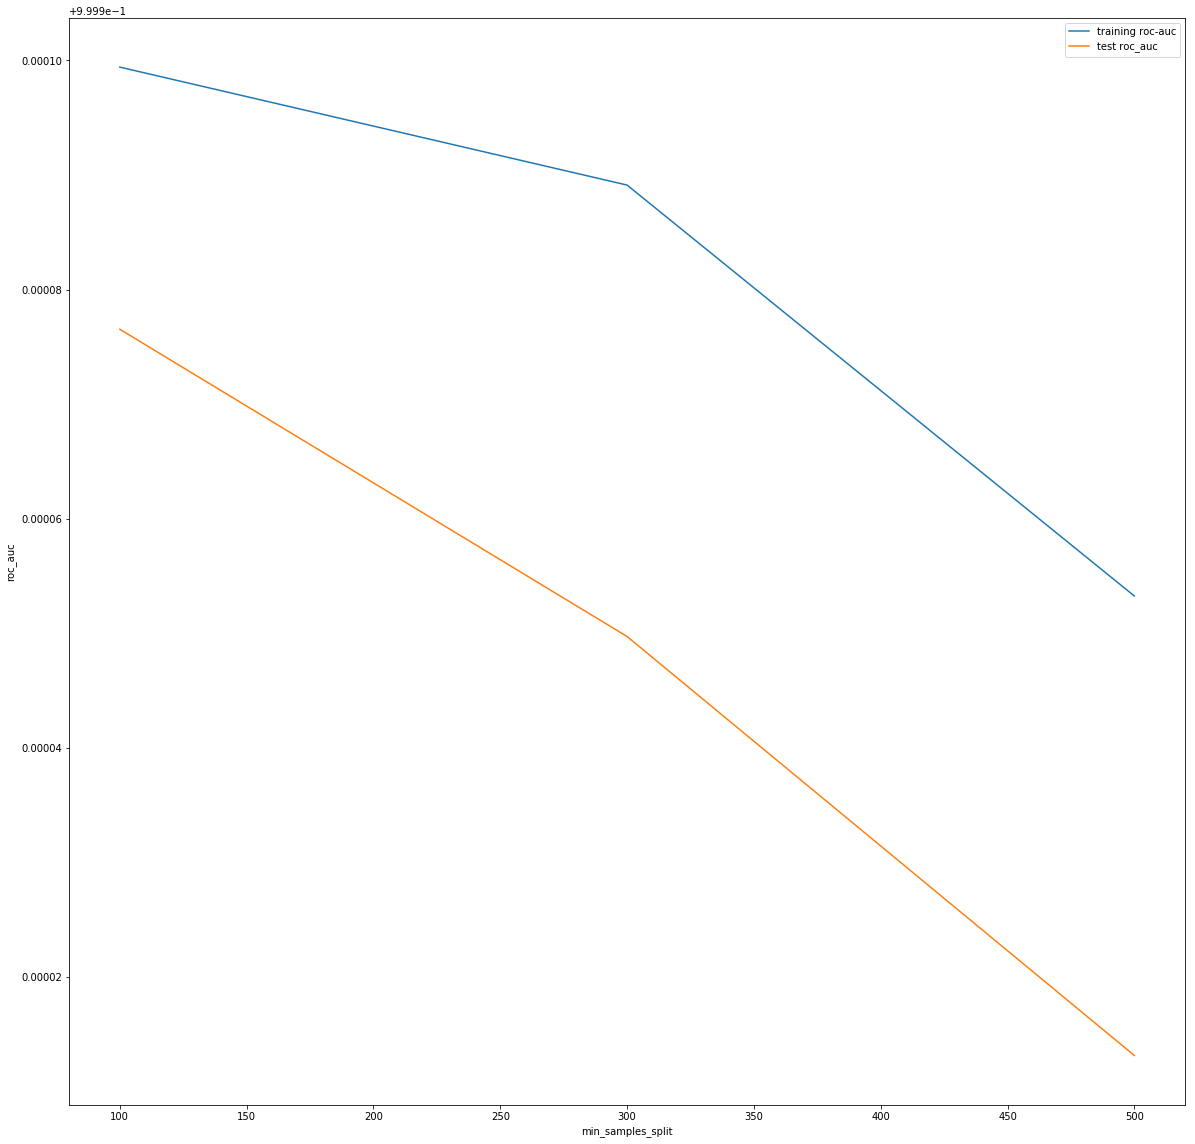

In [83]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 600, 200)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                  return_train_score=True)
rf.fit(X_train_smote, y_train_smote)

# scores of GridSearch CV
scores = rf.cv_results_


# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc-auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Finding the best combination of hyper parameters

In [94]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,14],
    'min_samples_leaf': [75,100,125],
    'min_samples_split':[75,100,125],
    'n_estimators': [150,200,250], 
    'max_features': [20,22,24]
}
# Create a based model
rf= RandomForestClassifier()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, random_state=42,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc",return_train_score=True)

# Fit the grid search to the data
random_search.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 1444.8min finished


We can get roc_auc of 0.9981722028576501 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 55, 'min_samples_split': 325}


In [98]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',random_search.best_score_,'using',random_search.best_params_)

We can get roc_auc of 0.9997809464118091 using {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 14}


#### Model with best hyperparameter

In [99]:
from sklearn.metrics import roc_auc_score
# model with the best hyperparameters
dt = RandomForestClassifier(max_depth=14,
                            max_features=20,
                            min_samples_leaf=100, 
                            min_samples_split=100,
                            n_estimators=200
                            )

# fit
dt.fit(X_train_smote, y_train_smote)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.9265842310475119


## XGBoost

In [85]:
# fit model on balanced training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)


# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test.values)

# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.34%


In [86]:
from xgboost import XGBClassifier

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


# fit the model
model_cv.fit(X_train_smote, y_train_smote)   

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)


# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 22.8min finished


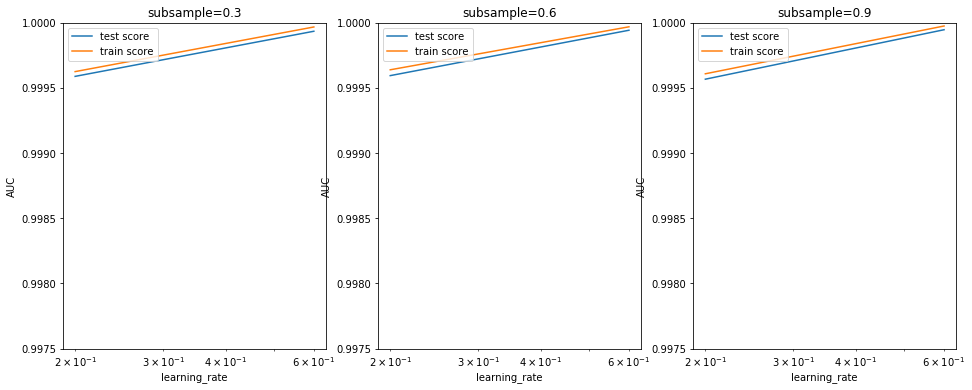

In [87]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.9975, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [89]:
#Let's build a final model with the chosen hyperparameters.

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_smote, y_train_smote)

# predict
y_pred = model.predict_proba(X_test.values)
y_pred[:10]

# roc_auc
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

0.9834038321293628

### Print the class distribution after applying ADASYN

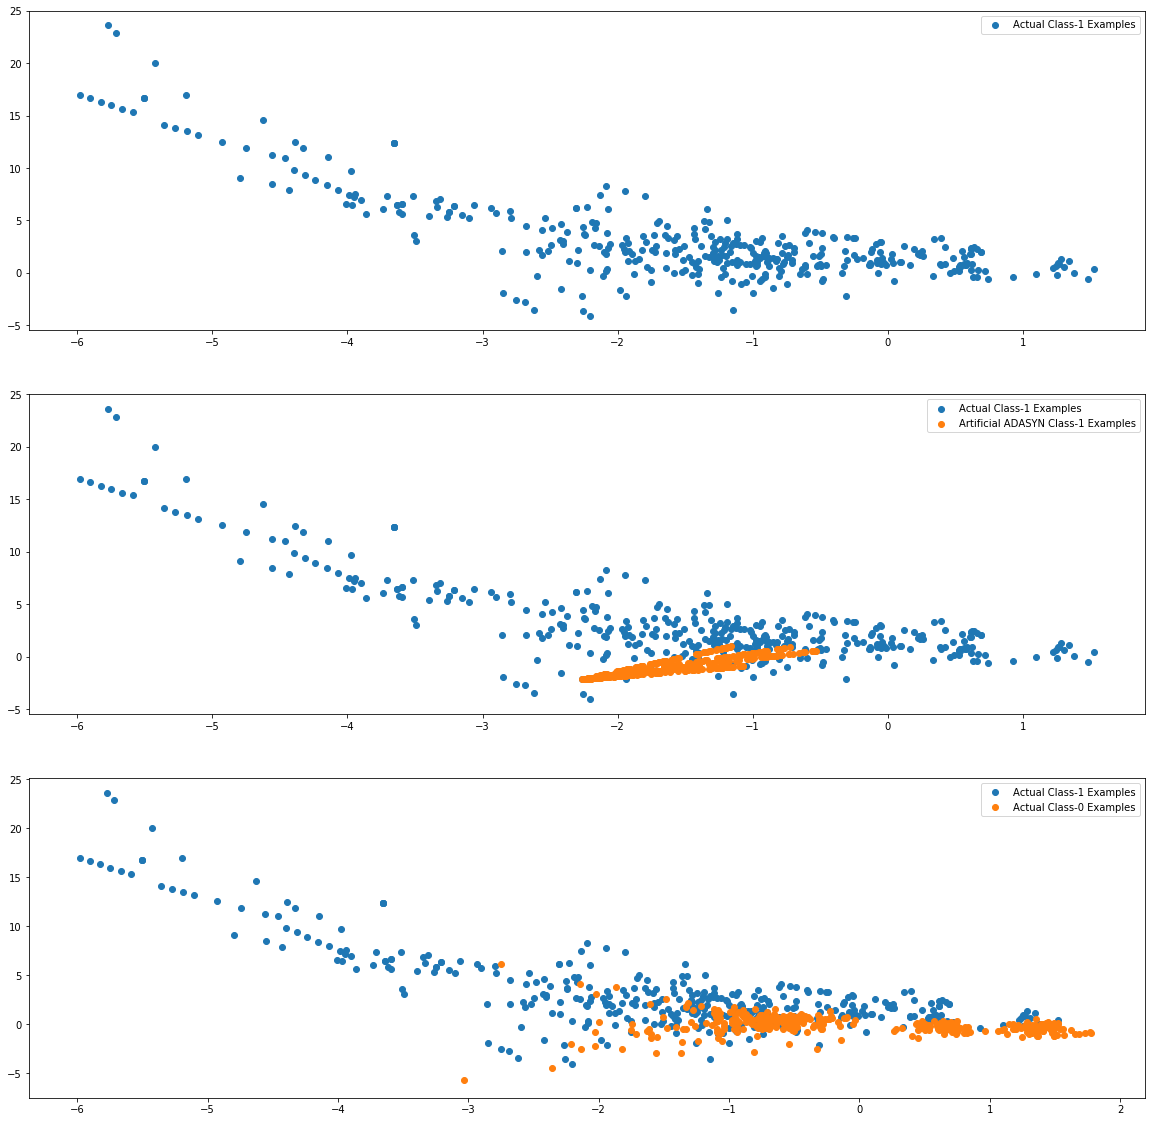

In [102]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic regression with Lasso regularization

In [103]:
# Logistic Regression with Lasso regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [.00001,.0001,0.001]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_adasyn, y_train_adasyn) 


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.994632,0.509027,0.008382,0.004443,1e-05,{'alpha': 1e-05},0.546050,0.543815,0.543542,0.542431,...,0.544749,0.001968,1,0.544614,0.545189,0.545249,0.545513,0.544159,0.544945,0.00049
1,4.663823,0.591256,0.011102,0.002731,0.0001,{'alpha': 0.0001},0.546036,0.543808,0.543552,0.542452,...,0.544749,0.001957,2,0.544613,0.545187,0.545248,0.545512,0.544158,0.544944,0.00049
2,3.442923,0.218700,0.010309,0.002731,0.001,{'alpha': 0.001},0.545803,0.543642,0.543551,0.542550,...,0.544640,0.001843,3,0.544499,0.545074,0.545133,0.545397,0.544043,0.544829,0.00049


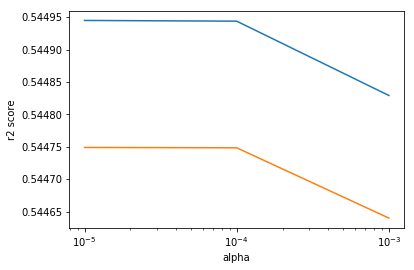

In [106]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()


In [107]:
# model with optimal alpha 10^-4
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train_adasyn, y_train_adasyn)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
# model evaluation
y_train_pred =lm.predict(X_train_adasyn)
print(metrics.roc_auc_score(y_train_adasyn, y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.roc_auc_score(y_test, y_test_pred))


0.9469399832049984
0.9635743858601402


train roc: 0.95 and test roc: 0.96

### Decision Tree Model

In [109]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_leaf': [50,100,150,200],
    'min_samples_split':[50,100,150,200],
    'max_features': ['auto', 'sqrt']
}
# Create a based model
dt= DecisionTreeClassifier()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = dt, param_distributions = param_grid, random_state=42,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc",return_train_score=True)

# Fit the grid search to the data
random_search.fit(X_train_adasyn, y_train_adasyn)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_leaf': [50, 100, 150, 200], 'min_samples_split': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=1)

In [110]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',random_search.best_score_,'using',random_search.best_params_)

We can get roc_auc of 0.9539671037289779 using {'min_samples_split': 200, 'min_samples_leaf': 200, 'max_features': 'sqrt', 'max_depth': 20}


In [111]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,20,22],
    'min_samples_leaf': [200,300],
    'min_samples_split': [200,300],
    'max_features': ['sqrt']
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   58.6s finished


We can get roc_auc of 0.9578101841699599 using {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 300, 'min_samples_split': 200}


In [112]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [22,24],
    'min_samples_leaf': [300,325],
    'min_samples_split': [200,225],
    'max_features': ['sqrt']
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='roc_auc',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

# printing the optimal roc_auc score and hyperparameters
print('We can get roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   38.4s finished


We can get roc_auc of 0.9589773576146413 using {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 300, 'min_samples_split': 225}


We are not able to increase accuracy further by using decision tree on adasyn balanced data

#### Model with best hyperparameters

In [128]:
from sklearn.metrics import roc_auc_score
# model with the best hyperparameters
dt = DecisionTreeClassifier(max_depth=22,
                            max_features='sqrt',
                            min_samples_leaf=300, 
                            min_samples_split=225
                )

# fit
dt.fit(X_train_adasyn, y_train_adasyn)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.9081982574965833


### Random Forest

#### Default model

In [123]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_adasyn,y_train_adasyn)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the roc_auc value of our default model
print(roc_auc_score(y_test,predictions))

0.8927867995819599


#### Hyper parameter tuning

In [125]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'n_estimators': range(100, 400, 100),
    'min_samples_leaf': range(100, 600, 200),
    'min_samples_split':range(100, 600, 200),
    'max_features': [4, 8, 14, 22, 29]
}
# Create a based model
rf= RandomForestClassifier()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, random_state=42,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc",return_train_score=True)

# Fit the grid search to the data
random_search.fit(X_train_adasyn, y_train_adasyn)


# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',random_search.best_score_,'using',random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 935.2min finished


We can get roc_auc of 0.9908724882169996 using {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 8, 'max_depth': 12}


#### Model with best hyper parameter

In [126]:
from sklearn.metrics import roc_auc_score
# model with the best hyperparameters
dt = RandomForestClassifier(max_depth=12,
                            max_features=8,
                            min_samples_leaf=100, 
                            min_samples_split=100,
                            n_estimators=100
                            )

# fit
dt.fit(X_train_adasyn, y_train_adasyn)

# predict
predictions = dt.predict(X_test)

#print roc_auc_score on test data
print(roc_auc_score(y_test,predictions))

0.9498258645044964


### XGBoost

#### Default model

In [115]:
# fit model on balanced training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_adasyn, y_train_adasyn)


# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test.values)

# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))


AUC: 97.56%


#### Hyperparameter tuning

In [114]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=2,
       min_child_weig...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

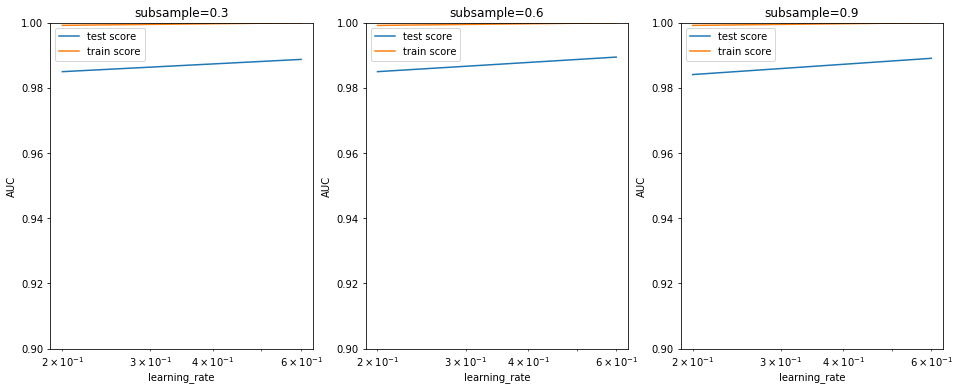

In [119]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)


# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')


# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.9, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


subsample is not affecting  auc score, as learning rate increases, train and test score comming closer

In [120]:
#Let's build a final model with the chosen hyperparameters.

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_adasyn, y_train_adasyn)

# predict
y_pred = model.predict_proba(X_test.values)
y_pred[:10]

# roc_auc
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

0.9755561604917712

In [122]:
#Let's build a final model with the chosen hyperparameters.

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 10,
          'n_estimators':300,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_adasyn, y_train_adasyn)

# predict
y_pred = model.predict_proba(X_test.values)
y_pred[:10]

# roc_auc
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

0.9755561604917712

we are not able to increase roc score beyond 0.975

## Final Choosen Balancing technique and Model

We have got the best ROC_AUC value (0.98) on test data by Using XGBoost model on SMOTE balanced dataset. So this is the final combination of Balancing technique and predictive model that we are going to choose for cost benefit analysis

In [142]:
#Final model

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_smote, y_train_smote)




In [151]:
# predict
y_train_pred = model.predict_proba(X_train_smote)[:,1]
y_test_pred = model.predict_proba(X_test.values)[:,1]

In [153]:
# converting y_train_pred and y_train_smote to data frames
y_train_pred_df=pd.DataFrame(y_train_pred)
y_train_pred_df.head()

,0
0,2.760006e-07
1,1.754429e-06
2,4.532909e-06
3,6.082597e-06
4,2.861397e-05


In [154]:
y_train_smote_df = pd.DataFrame(y_train_smote)
y_train_smote_df.head()


,0
0,0
1,0
2,0
3,0
4,0


In [155]:
# Removing index for both dataframes to append them side by side 
y_train_pred_df.reset_index(drop=True, inplace=True)
y_train_smote_df.reset_index(drop=True, inplace=True)

# Appending bal_y_train_df and pred_probs_train_df
y_pred_final = pd.concat([y_train_smote_df,y_train_pred_df],axis=1)
y_pred_final.head()

,0,0
0,0,2.760006e-07
1,0,1.754429e-06
2,0,4.532909e-06
3,0,6.082597e-06
4,0,2.861397e-05


In [158]:
# Renaming the column 
y_pred_final.columns=['Class','Fraud_Prob']

# Let's see the head of y_pred_final
y_pred_final.head()

,Class,Fraud_Prob
0,0,2.760006e-07
1,0,1.754429e-06
2,0,4.532909e-06
3,0,6.082597e-06
4,0,2.861397e-05


#### Print the FPR,TPR & select the best threshold from the roc curve

In [185]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [186]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Class, y_pred_final.Fraud_Prob, drop_intermediate = False )
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99999121 0.9999956  1.        ]
[0.00000000e+00 2.02241362e-04 1.17827576e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.9999999e+00 9.9999988e-01 9.9999976e-01 ... 1.2218869e-10 1.0574004e-10
 6.2971885e-11]


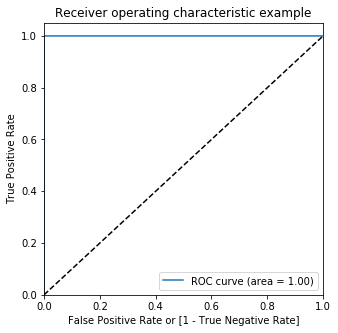

In [160]:
draw_roc( y_pred_final.Class, y_pred_final.Fraud_Prob)

In [183]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/1000 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Class,Fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.09,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009
0,0,2.760006e-07,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.754429e-06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.532909e-06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6.082597e-06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.861397e-05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)




     prob  accuracy  sensi     speci
0.0   0.0  0.500000    1.0  0.000000
0.1   0.1  0.999793    1.0  0.999587
0.2   0.2  0.999932    1.0  0.999864
0.3   0.3  0.999987    1.0  0.999974
0.4   0.4  0.999987    1.0  0.999974
0.5   0.5  0.999993    1.0  0.999987
0.6   0.6  0.999996    1.0  0.999991
0.7   0.7  0.999998    1.0  0.999996
0.8   0.8  0.999998    1.0  0.999996
0.9   0.9  0.999998    1.0  0.999996


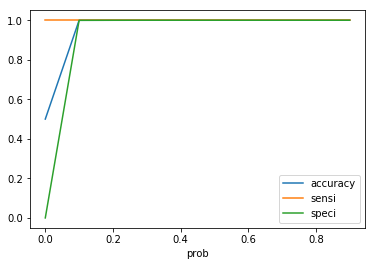

In [193]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.7 is the optimum point to take it as a cutoff probability as further increase in threshhold is not increasing sensitivity and specificity both.

#### Model evaluation on test data

In [238]:
# do the inverse power transform on test data to get the original column values
X_test_original = pt.inverse_transform(X_test[cols])

In [259]:
# Converting X_test_original to dataframe
X_test_original_df=pd.DataFrame(X_test_original)
X_test_original_df.columns=cols
X_test_original_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
1,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
2,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
3,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
4,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


In [261]:
# Converting y_test_pred to dataframe
y_test_pred_df=pd.DataFrame(y_test_pred)


# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
X_test_original_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred_df and X_test_original_df
y_pred_final_test = pd.concat([y_test_df,y_test_pred_df,X_test_original_df],axis=1)
y_pred_final_test.head()

,Class,0,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755098e-08,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
1,0,2.606869e-06,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
2,0,1.814460e-06,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
3,0,9.015551e-09,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
4,0,5.194375e-05,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


In [262]:
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 0 : 'Fraud_Prob'})

# Let's see the head of y_pred_final
y_pred_final_test.head()


,Class,Fraud_Prob,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755098e-08,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
1,0,2.606869e-06,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
2,0,1.814460e-06,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
3,0,9.015551e-09,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
4,0,5.194375e-05,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


In [278]:
y_pred_final_test['predicted']= y_pred_final_test.Fraud_Prob.map(lambda x: 1 if x > 0.7 else 0)
y_pred_final_test.head()


,Class,Fraud_Prob,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,predicted
0,0,1.755098e-08,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,...,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00,0
1,0,2.606869e-06,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,...,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85,0
2,0,1.814460e-06,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,...,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07,0
3,0,9.015551e-09,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,...,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99,0
4,0,5.194375e-05,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,...,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50,0


In [279]:
# confusion matrix
confusion=metrics.confusion_matrix(y_pred_final_test.Class,y_pred_final_test.predicted)
print(confusion)

[[56844    20]
 [   14    84]]


In [280]:
TP = confusion[1,1] # true positive 84
TN = confusion[0,0] # true negatives 56844
FP = confusion[0,1] # false positives 20
FN = confusion[1,0] # false negatives 14

In [281]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(precision)
print(recall)

0.8076923076923077
0.8571428571428571


## Cost Benefit Analysis

In [282]:
## total savings can be calculated as 
##(TP x cost of each transaction (correct predictions) -[ (TP+FP) x 10 + FN x Cost of all transactions (incorrect predictions)] )

In [283]:
total_savings=y_pred_final_test.loc[((y_pred_final_test.Class==1) & (y_pred_final_test.predicted==1)),['Amount']].sum()-(TP+FP)*10-y_pred_final_test.loc[((y_pred_final_test.Class==1) & (y_pred_final_test.predicted==0)),['Amount']].sum()
total_savings

Amount    5926.29
dtype: float64

By applying the XGBoost model with SMOTE oversampling on test set bank is able to save 5926 rupees